In [75]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from math import sin as f

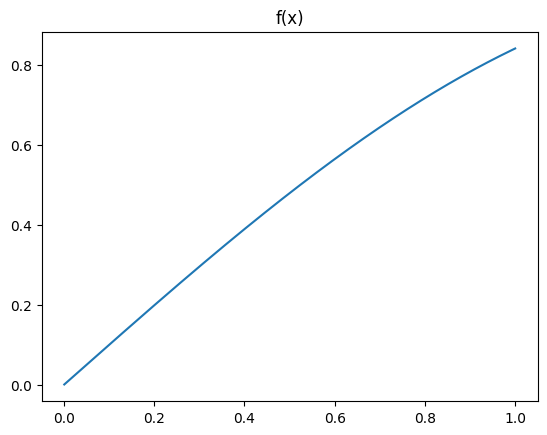

In [76]:
grau = 10
start = 0.001
end = 1
pontos = 10000

x = np.linspace(start,end,pontos)
y = [f(x) for x in x]

plt.plot(x,y)
plt.title("f(x)")
plt.show()

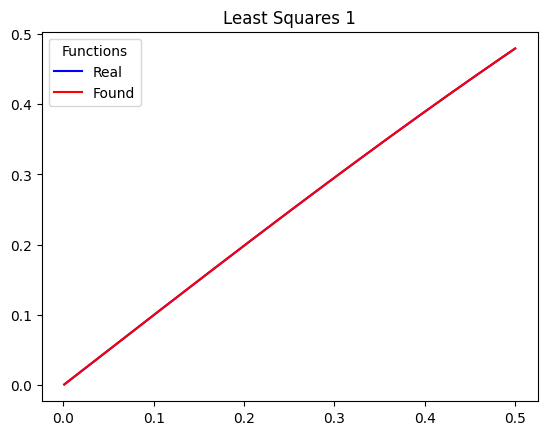

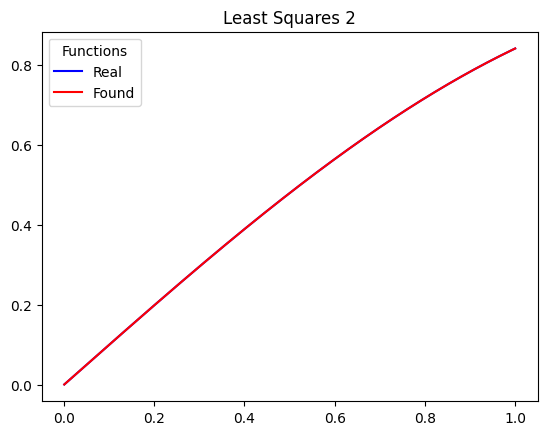

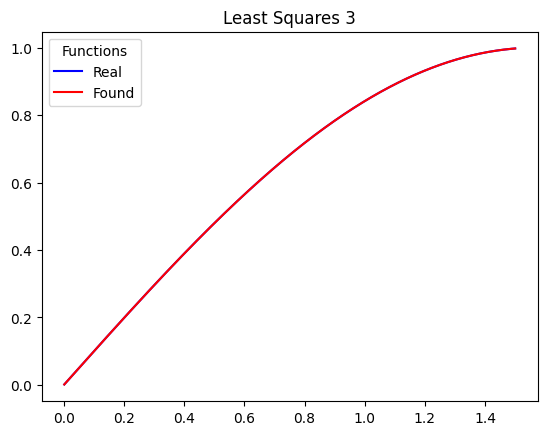

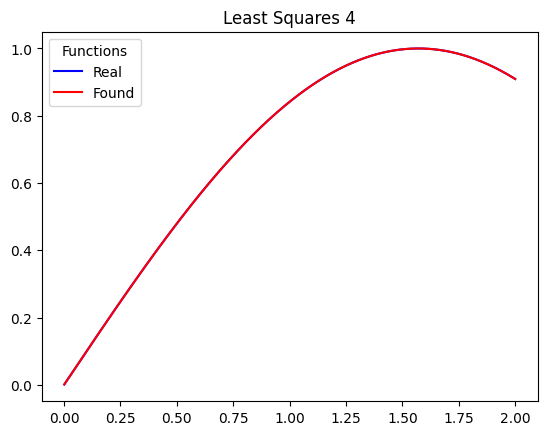

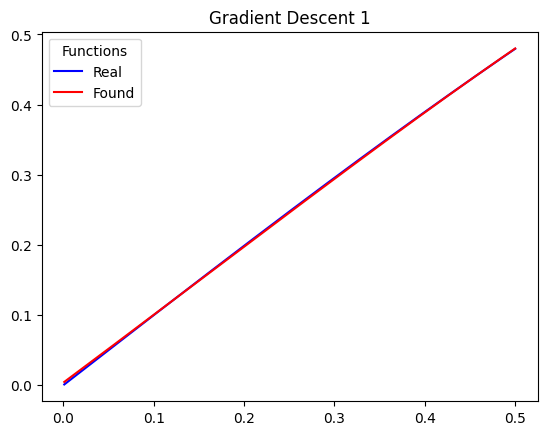

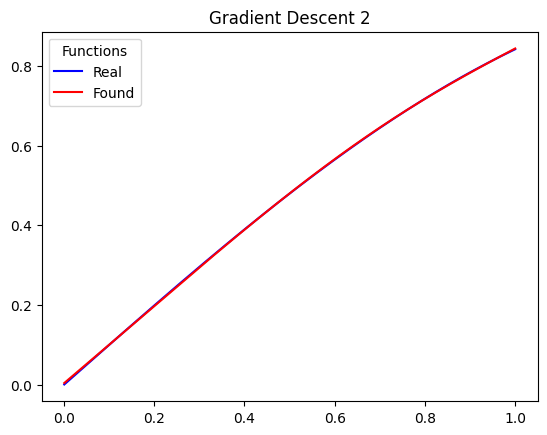

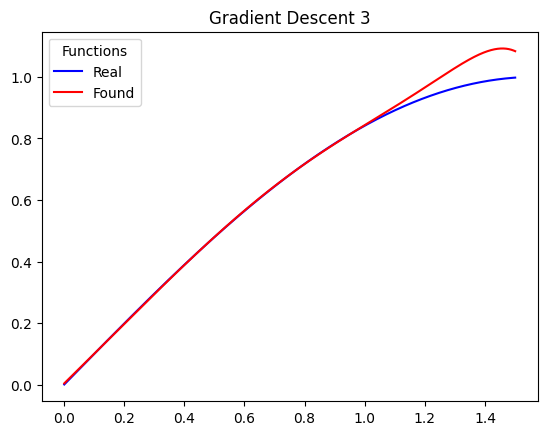

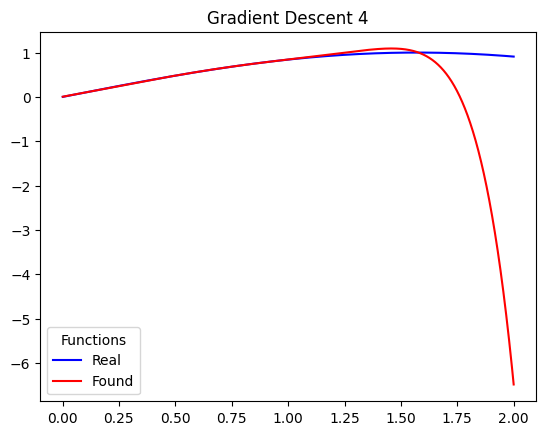

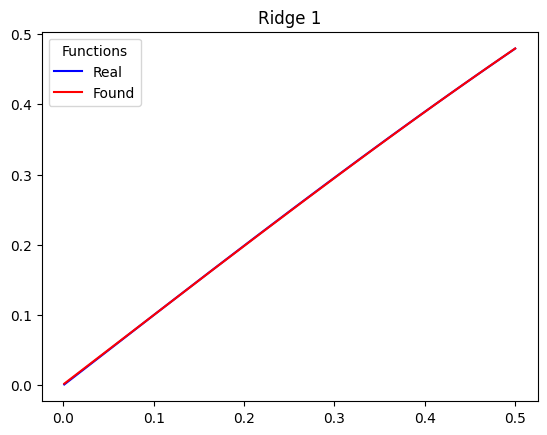

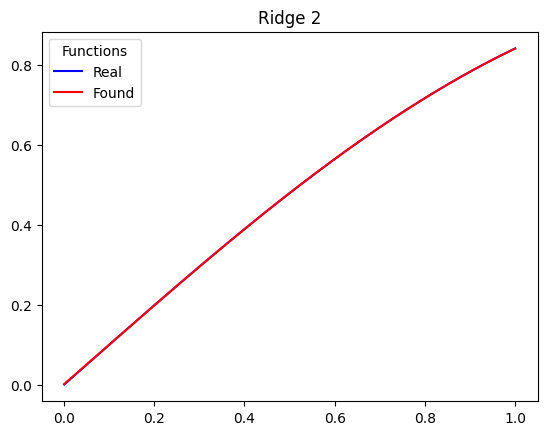

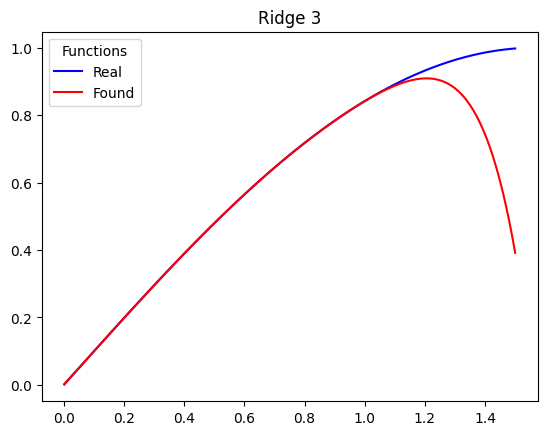

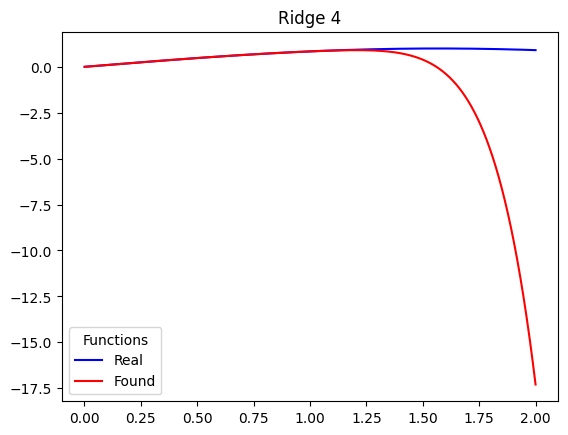

In [77]:
X_t = x[:,np.newaxis]

names = ( "Least Squares" , "Gradient Descent" , "Ridge" )
objs = (linear_model.LinearRegression() , linear_model.SGDRegressor(learning_rate="adaptive") , linear_model.Ridge() )

for i in range(len(objs)):
    
    model = make_pipeline(
        PolynomialFeatures(grau),
        StandardScaler(),
        objs[i]
    )

    model.fit(X_t,y)

    for j in range(1,5):

        t = np.linspace(start,j*end/2,pontos)
        y_ = [f(x) for x in t]

        T_t = t[:,np.newaxis]
        y_found = model.predict(T_t)

        plt.plot(t,y_,color="blue",label="Real")
        plt.plot(t,y_found,color="red",label="Found")
        plt.legend(title='Functions')

        plt.title(f'{names[i]} {j}')
        plt.show()
